# Financial Planning with APIs and Simulations

In this Challenge, you’ll create two financial analysis tools by using a single Jupyter notebook:

Part 1: A financial planner for emergencies. The members will be able to use this tool to visualize their current savings. The members can then determine if they have enough reserves for an emergency fund.

Part 2: A financial planner for retirement. This tool will forecast the performance of their retirement portfolio in 30 years. To do this, the tool will make an Alpaca API call via the Alpaca SDK to get historical price data for use in Monte Carlo simulations.

You’ll use the information from the Monte Carlo simulation to answer questions about the portfolio in your Jupyter notebook.



In [120]:
# Import the required libraries and dependencies
import os
import requests
import json
import pandas as pd
from dotenv import load_dotenv
import alpaca_trade_api as tradeapi
from MCForecastTools import MCSimulation
import matplotlib.pyplot as plt
import datetime as dt

%matplotlib inline

In [74]:
# Load the environment variables from the .env file
#by calling the load_dotenv function
load_dotenv("APIKEYS.env")

True

## Part 1: Create a Financial Planner for Emergencies

### Evaluate the Cryptocurrency Wallet by Using the Requests Library

In this section, you’ll determine the current value of a member’s cryptocurrency wallet. You’ll collect the current prices for the Bitcoin and Ethereum cryptocurrencies by using the Python Requests library. For the prototype, you’ll assume that the member holds the 1.2 Bitcoins (BTC) and 5.3 Ethereum coins (ETH). To do all this, complete the following steps:

1. Create a variable named `monthly_income`, and set its value to `12000`.

2. Use the Requests library to get the current price (in US dollars) of Bitcoin (BTC) and Ethereum (ETH) by using the API endpoints that the starter code supplies.

3. Navigate the JSON response object to access the current price of each coin, and store each in a variable.

    > **Hint** Note the specific identifier for each cryptocurrency in the API JSON response. The Bitcoin identifier is `1`, and the Ethereum identifier is `1027`.

4. Calculate the value, in US dollars, of the current amount of each cryptocurrency and of the entire cryptocurrency wallet.



In [75]:
# The current number of coins for each cryptocurrency asset held in the portfolio.
btc_coins = 1.2
eth_coins = 5.3

#### Step 1: Create a variable named `monthly_income`, and set its value to `12000`.

In [76]:
# The monthly amount for the member's household income
monthly_income = 12000


#### Review the endpoint URLs for the API calls to Free Crypto API in order to get the current pricing information for both BTC and ETH.

In [77]:
# The Free Crypto API Call endpoint URLs for the held cryptocurrency assets
btc_url = "https://api.alternative.me/v2/ticker/Bitcoin/?convert=USD"
eth_url = "https://api.alternative.me/v2/ticker/Ethereum/?convert=USD"

#### Step 2. Use the Requests library to get the current price (in US dollars) of Bitcoin (BTC) and Ethereum (ETH) by using the API endpoints that the starter code supplied.

In [78]:
# Using the Python requests library, make an API call to access the current price of BTC
btc_response =  requests.get("https://api.alternative.me/v2/ticker/Bitcoin/?convert=USD")

# Use the json.dumps function to review the response data from the API call
# Use the indent and sort_keys parameters to make the response object readable
print(json.dumps(btc_response.json(), indent=4, sort_keys=True))


{
    "data": {
        "1": {
            "circulating_supply": 19350350,
            "id": 1,
            "last_updated": 1681875284,
            "max_supply": 21000000,
            "name": "Bitcoin",
            "quotes": {
                "USD": {
                    "market_cap": 585336932160,
                    "percent_change_1h": 0.103993520504777,
                    "percent_change_24h": 2.57927626988928,
                    "percent_change_7d": -0.0815932564968448,
                    "percentage_change_1h": 0.103993520504777,
                    "percentage_change_24h": 2.57927626988928,
                    "percentage_change_7d": -0.0815932564968448,
                    "price": 30236.0,
                    "volume_24h": 17692133767
                }
            },
            "rank": 1,
            "symbol": "BTC",
            "total_supply": 19350350,
            "website_slug": "bitcoin"
        }
    },
    "metadata": {
        "error": null,
        "num_cryptocurre

In [79]:
# Using the Python requests library, make an API call to access the current price ETH
eth_response = requests.get('https://api.coinbase.com/v2/prices/ETH-USD/spot')

# Use the json.dumps function to review the response data from the API call
# Use the indent and sort_keys parameters to make the response object readable
print(json.dumps(eth_response.json(), indent=4, sort_keys=True))


{
    "data": {
        "amount": "2095.16",
        "base": "ETH",
        "currency": "USD"
    }
}


#### Step 3: Navigate the JSON response object to access the current price of each coin, and store each in a variable.

In [80]:
# Navigate the BTC response object to access the current price of BTC
btc_price = float(btc_response.json()['data']['1']['quotes']['USD']['price'])
                

# Print the current price of BTC
print("The current price of BTC is ${:.2f}".format(btc_price))

The current price of BTC is $30236.00


In [81]:
# Navigate the BTC response object to access the current price of ETH
eth_price = float(eth_response.json()['data']['amount'])

# Print the current price of ETH
print("The current price of ETH is ${:.2f}".format(eth_price))


The current price of ETH is $2095.16


### Step 4: Calculate the value, in US dollars, of the current amount of each cryptocurrency and of the entire cryptocurrency wallet.

In [82]:
# Compute the current value of the BTC holding 
btc_value = btc_price * btc_coins


# Print current value of your holding in BTC
print("The current value of your holding in BTC is ${:.2f}".format(btc_value))

The current value of your holding in BTC is $36283.20


In [83]:
# Compute the current value of the ETH holding 
eth_value = eth_price * eth_coins


# Print current value of your holding in ETH
print(f"The current value of your ETH holding is ${eth_value:.2f}")


The current value of your ETH holding is $11104.35


In [84]:
# Compute the total value of the cryptocurrency wallet
# Add the value of the BTC holding to the value of the ETH holding
total_crypto_wallet = btc_value + eth_value

# Print current cryptocurrency wallet balance
print(f"The current value of your cryptocurrency wallet is ${total_crypto_wallet:.2f}")

The current value of your cryptocurrency wallet is $47387.55


### Evaluate the Stock and Bond Holdings by Using the Alpaca SDK

In this section, you’ll determine the current value of a member’s stock and bond holdings. You’ll make an API call to Alpaca via the Alpaca SDK to get the current closing prices of the SPDR S&P 500 ETF Trust (ticker: SPY) and of the iShares Core US Aggregate Bond ETF (ticker: AGG). For the prototype, assume that the member holds 110 shares of SPY, which represents the stock portion of their portfolio, and 200 shares of AGG, which represents the bond portion. To do all this, complete the following steps:

1. In the `Starter_Code` folder, create an environment file (`.env`) to store the values of your Alpaca API key and Alpaca secret key.

2. Set the variables for the Alpaca API and secret keys. Using the Alpaca SDK, create the Alpaca `tradeapi.REST` object. In this object, include the parameters for the Alpaca API key, the secret key, and the version number.

3. Set the following parameters for the Alpaca API call:

    - `tickers`: Use the tickers for the member’s stock and bond holdings.

    - `timeframe`: Use a time frame of one day.

    - `start_date` and `end_date`: Use the same date for these parameters, and format them with the date of the previous weekday (or `2020-08-07`). This is because you want the one closing price for the most-recent trading day.

4. Get the current closing prices for `SPY` and `AGG` by using the Alpaca `get_bars` function. Format the response as a Pandas DataFrame by including the `df` property at the end of the `get_bars` function.

5. Navigating the Alpaca response DataFrame, select the `SPY` and `AGG` closing prices, and store them as variables.

6. Calculate the value, in US dollars, of the current amount of shares in each of the stock and bond portions of the portfolio, and print the results.


#### Review the total number of shares held in both (SPY) and (AGG).

In [85]:
# Current amount of shares held in both the stock (SPY) and bond (AGG) portion of the portfolio.
spy_shares = 110
agg_shares = 200


#### Step 1: In the `Starter_Code` folder, create an environment file (`.env`) to store the values of your Alpaca API key and Alpaca secret key.

#### Step 2: Set the variables for the Alpaca API and secret keys. Using the Alpaca SDK, create the Alpaca `tradeapi.REST` object. In this object, include the parameters for the Alpaca API key, the secret key, and the version number.

In [86]:
# Set the variables for the Alpaca API and secret keys
# ALPACA_API_KEY = os.environ.get("APCA-API-KEY-ID")
# ALPACA_SECRET_KEY = os.environ.get("APCA-API-SECRET-KEY")

# Create the Alpaca tradeapi.REST object
# api = tradeapi.REST(ALPACA_SECRET_KEY, ALPACA_API_KEY , api_version="v2")

#### Step 3: Set the following parameters for the Alpaca API call:

- `tickers`: Use the tickers for the member’s stock and bond holdings.

- `timeframe`: Use a time frame of one day.

- `start_date` and `end_date`: Use the same date for these parameters, and format them with the date of the previous weekday (or `2020-08-07`). This is because you want the one closing price for the most-recent trading day.


In [87]:
# Set the tickers for both the bond and stock portion of the portfolio
tickers = ['SPY', 'AGG']

# Set timeframe to 1Day
timeframe = "1Day"

# Format current date as ISO format
# Set both the start and end date at the date of your prior weekday 
# This will give you the closing price of the previous trading day
# Alternatively you can use a start and end date of 2020-08-07
today = pd.Timestamp("now", tz="America/New_York").strftime("%Y-%m-%d")
previous_weekday = pd.date_range(end=today, periods=2, freq='B')[0].strftime('%Y-%m-%d')
start_date = previous_weekday
end_date = previous_weekday


#### Step 4: Get the current closing prices for `SPY` and `AGG` by using the Alpaca `get_bars` function. Format the response as a Pandas DataFrame by including the `df` property at the end of the `get_bars` function.

In [88]:
# Print out the API keys
print("ALPACA_API_SECRET_KEY:", os.environ['ALPACA_API_KEY'])
print("ALPACA_API_KEY:", os.environ['ALPACA_SECRET_KEY'])
ALPACA_SECRET_KEY = os.environ['ALPACA_API_KEY']
ALPACA_API_KEY =  os.environ['ALPACA_SECRET_KEY']
# Use the Alpaca API
# api = tradeapi.REST()
api = tradeapi.REST(ALPACA_SECRET_KEY, ALPACA_API_KEY , api_version="v2")

ALPACA_API_SECRET_KEY: AKHXVMG6EB29JKDVRWO0
ALPACA_API_KEY: xTMUeFNNc2MoTpVT44BSUJ9cGrU44kdfVcdvHMpF


In [89]:
# Use the Alpaca get_bars function to get current closing prices the portfolio
# Be sure to set the `df` property after the function to format the response object as a DataFrame
portfolio_df = api.get_bars(tickers,
                              timeframe,
                              start = start_date,
                              end = end_date
                             ).df
# Reorganize the DataFrame
# Separate ticker data
SPY = portfolio_df[portfolio_df['symbol'] =='SPY'].drop('symbol', axis=1)
AGG = portfolio_df[portfolio_df['symbol']=='AGG'].drop('symbol', axis=1)

# Concatenate the ticker DataFrames
portfolio_df = pd.concat([SPY,AGG],axis=1, keys=['SPY','AGG'])

# Review the first 5 rows of the Alpaca DataFrame
portfolio_df.head()


SPY                                     \
                             open    high      low   close    volume   
timestamp                                                              
2023-04-17 04:00:00+00:00  412.37  413.96  411.085  413.94  64863629   

                                                    AGG                       \
                          trade_count       vwap   open    high    low close   
timestamp                                                                      
2023-04-17 04:00:00+00:00      465564  412.59434  99.13  99.175  98.88  98.9   

                                                           
                            volume trade_count       vwap  
timestamp                                                  
2023-04-17 04:00:00+00:00  4417660       18342  98.943593

#### Step 5: Navigating the Alpaca response DataFrame, select the `SPY` and `AGG` closing prices, and store them as variables.

In [90]:
# Access the closing price for AGG from the Alpaca DataFrame
# Converting the value to a floating point number
agg_close_price = float(portfolio_df['AGG']['close'][0])

# Print the AGG closing price
print("AGG closing price:",agg_close_price)

AGG closing price: 98.9


In [91]:
# Access the closing price for SPY from the Alpaca DataFrame
# Converting the value to a floating point number
spy_close_price = float(portfolio_df['SPY']['close'][0])

# Print the SPY closing price
print("SPY closing price:", spy_close_price)


SPY closing price: 413.94


#### Step 6: Calculate the value, in US dollars, of the current amount of shares in each of the stock and bond portions of the portfolio, and print the results.

In [92]:
# Calculate the current value of the bond portion of the portfolio
agg_value = AGG['close'].iloc[-1] * 200

# Print the current value of the bond portfolio
print(f"The current value of the AGG holdings in the portfolio is: ${agg_value:,.2f}")

The current value of the AGG holdings in the portfolio is: $19,780.00


In [93]:
# Calculate the current value of the stock portion of the portfolio
spy_value = SPY['close'].iloc[-1] * 110

# Print the current value of the stock portfolio
print(f"The current value of the SPY holdings in the portfolio is:${spy_value:,.2f}")


The current value of the SPY holdings in the portfolio is:$45,533.40


In [94]:
# Calculate the total value of the stock and bond portion of the portfolio
total_stocks_bonds = total_stocks_bonds = spy_value + agg_value


# Print the current balance of the stock and bond portion of the portfolio
print(f"The current balance of the stock and bond portion of the portfolio is ${total_stocks_bonds:,.2f}.")

The current balance of the stock and bond portion of the portfolio is $65,313.40.


In [95]:
# Calculate the total value of the member's entire savings portfolio
# Add the value of the cryptocurrency walled to the value of the total stocks and bonds
total_portfolio = total_stocks_bonds + total_crypto_wallet
# Print current cryptocurrency wallet balance
print(f"The current balance of the cryptocurrency wallet is {total_crypto_wallet:.2f} USD.")


The current balance of the cryptocurrency wallet is 47387.55 USD.


### Evaluate the Emergency Fund

In this section, you’ll use the valuations for the cryptocurrency wallet and for the stock and bond portions of the portfolio to determine if the credit union member has enough savings to build an emergency fund into their financial plan. To do this, complete the following steps:

1. Create a Python list named `savings_data` that has two elements. The first element contains the total value of the cryptocurrency wallet. The second element contains the total value of the stock and bond portions of the portfolio.

2. Use the `savings_data` list to create a Pandas DataFrame named `savings_df`, and then display this DataFrame. The function to create the DataFrame should take the following three parameters:

    - `savings_data`: Use the list that you just created.

    - `columns`: Set this parameter equal to a Python list with a single value called `amount`.

    - `index`: Set this parameter equal to a Python list with the values of `crypto` and `stock/bond`.

3. Use the `savings_df` DataFrame to plot a pie chart that visualizes the composition of the member’s portfolio. The y-axis of the pie chart uses `amount`. Be sure to add a title.

4. Using Python, determine if the current portfolio has enough to create an emergency fund as part of the member’s financial plan. Ideally, an emergency fund should equal to three times the member’s monthly income. To do this, implement the following steps:

    1. Create a variable named `emergency_fund_value`, and set it equal to three times the value of the member’s `monthly_income` of $12000. (You set this earlier in Part 1).

    2. Create a series of three if statements to determine if the member’s total portfolio is large enough to fund the emergency portfolio:

        1. If the total portfolio value is greater than the emergency fund value, display a message congratulating the member for having enough money in this fund.

        2. Else if the total portfolio value is equal to the emergency fund value, display a message congratulating the member on reaching this important financial goal.

        3. Else the total portfolio is less than the emergency fund value, so display a message showing how many dollars away the member is from reaching the goal. (Subtract the total portfolio value from the emergency fund value.)


#### Step 1: Create a Python list named `savings_data` that has two elements. The first element contains the total value of the cryptocurrency wallet. The second element contains the total value of the stock and bond portions of the portfolio.

In [96]:
# Consolidate financial assets data into a Python list
savings_data = [total_crypto_wallet, total_stocks_bonds]

# Review the Python list savings_data
print(savings_data)

[47387.547999999995, 65313.4]


#### Step 2: Use the `savings_data` list to create a Pandas DataFrame named `savings_df`, and then display this DataFrame. The function to create the DataFrame should take the following three parameters:

- `savings_data`: Use the list that you just created.

- `columns`: Set this parameter equal to a Python list with a single value called `amount`.

- `index`: Set this parameter equal to a Python list with the values of `crypto` and `stock/bond`.


In [97]:
# Create a Pandas DataFrame called savings_df 
savings_data = [total_crypto_wallet, total_stocks_bonds]

# Display the savings_df DataFrame
savings_df = pd.DataFrame(data=savings_data, columns=['amount'], index=['crypto', 'stock/bond'])




#### Step 3: Use the `savings_df` DataFrame to plot a pie chart that visualizes the composition of the member’s portfolio. The y-axis of the pie chart uses `amount`. Be sure to add a title.

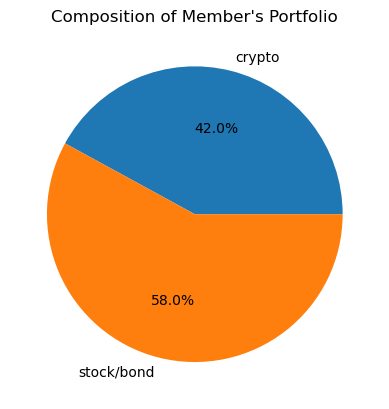

In [98]:
# Plot the total value of the member's portfolio (crypto and stock/bond) in a pie chart
plt.pie(savings_df['amount'], labels=savings_df.index, autopct='%1.1f%%')
plt.title("Composition of Member's Portfolio")
plt.show()

#### Step 4: Using Python, determine if the current portfolio has enough to create an emergency fund as part of the member’s financial plan. Ideally, an emergency fund should equal to three times the member’s monthly income. To do this, implement the following steps:

Step 1. Create a variable named `emergency_fund_value`, and set it equal to three times the value of the member’s `monthly_income` of 12000. (You set this earlier in Part 1).

Step 2. Create a series of three if statements to determine if the member’s total portfolio is large enough to fund the emergency portfolio:

* If the total portfolio value is greater than the emergency fund value, display a message congratulating the member for having enough money in this fund.

* Else if the total portfolio value is equal to the emergency fund value, display a message congratulating the member on reaching this important financial goal.

* Else the total portfolio is less than the emergency fund value, so display a message showing how many dollars away the member is from reaching the goal. (Subtract the total portfolio value from the emergency fund value.)


##### Step 4-1: Create a variable named `emergency_fund_value`, and set it equal to three times the value of the member’s `monthly_income` of 12000. (You set this earlier in Part 1).

In [99]:
# Create a variable named emergency_fund_value
emergency_fund_value = 3 * monthly_income


##### Step 4-2: Create a series of three if statements to determine if the member’s total portfolio is large enough to fund the emergency portfolio:

* If the total portfolio value is greater than the emergency fund value, display a message congratulating the member for having enough money in this fund.

* Else if the total portfolio value is equal to the emergency fund value, display a message congratulating the member on reaching this important financial goal.

* Else the total portfolio is less than the emergency fund value, so display a message showing how many dollars away the member is from reaching the goal. (Subtract the total portfolio value from the emergency fund value.)

In [100]:
# Evaluate the possibility of creating an emergency fund with 3 conditions:
# Check if total portfolio value is greater than emergency fund value
if total_portfolio > emergency_fund_value:
    print("Congratulations! You have enough money in your emergency fund.")

# Check if total portfolio value is equal to emergency fund value
elif total_portfolio_value == emergency_fund_value:
    print("Congratulations! You have reached your goal of having an emergency fund equal to three times your monthly income.")

# Otherwise, total portfolio value is less than emergency fund value
else:
    dollars_needed = emergency_fund_value - total_portfolio_value
    print(f"You are ${dollars_needed:,.2f} away from your goal of having an emergency fund equal to three times your monthly income.")

Congratulations! You have enough money in your emergency fund.


## Part 2: Create a Financial Planner for Retirement

### Create the Monte Carlo Simulation

In this section, you’ll use the MCForecastTools library to create a Monte Carlo simulation for the member’s savings portfolio. To do this, complete the following steps:

1. Make an API call via the Alpaca SDK to get 3 years of historical closing prices for a traditional 60/40 portfolio split: 60% stocks (SPY) and 40% bonds (AGG).

2. Run a Monte Carlo simulation of 500 samples and 30 years for the 60/40 portfolio, and then plot the results.The following image shows the overlay line plot resulting from a simulation with these characteristics. However, because a random number generator is used to run each live Monte Carlo simulation, your image will differ slightly from this exact image:

![A screenshot depicts the resulting plot.](Images/5-4-monte-carlo-line-plot.png)

3. Plot the probability distribution of the Monte Carlo simulation. Plot the probability distribution of the Monte Carlo simulation. The following image shows the histogram plot resulting from a simulation with these characteristics. However, because a random number generator is used to run each live Monte Carlo simulation, your image will differ slightly from this exact image:

![A screenshot depicts the histogram plot.](Images/5-4-monte-carlo-histogram.png)

4. Generate the summary statistics for the Monte Carlo simulation.



#### Step 1: Make an API call via the Alpaca SDK to get 3 years of historical closing prices for a traditional 60/40 portfolio split: 60% stocks (SPY) and 40% bonds (AGG).

In [101]:
# Set start and end dates of 3 years back from your current date
# Alternatively, you can use an end date of 2020-08-07 and work 3 years back from that date 
end_date = datetime.date.today()-datetime.timedelta(days=1) 
start_date = end_date - datetime.timedelta(days=3*365)


In [102]:
# Use the Alpaca get_bars function to make the API call to get the 3 years worth of pricing data
# The tickers and timeframe parameters should have been set in Part 1 of this activity 
# The start and end dates should be updated with the information set above
# Remember to add the df property to the end of the call so the response is returned as a DataFrame
bars = api.get_bars(tickers,
                        timeframe=timeframe,
                        start=start_date,
                        end=end_date,
                        limit=1000
                        ).df
bars

,open,high,low,close,volume,trade_count,vwap,symbol
timestamp,,,,,,,,
2020-04-17 04:00:00+00:00,117.52,117.62,117.035,117.25,4949824,25621,117.358347,AGG
2020-04-20 04:00:00+00:00,117.15,117.28,116.940,117.08,3847904,18508,117.030930,AGG
2020-04-21 04:00:00+00:00,117.43,117.44,117.070,117.14,4660507,19425,117.166762,AGG
2020-04-22 04:00:00+00:00,117.16,117.24,116.940,117.14,4647244,17538,117.056879,AGG
2020-04-23 04:00:00+00:00,117.33,117.45,117.190,117.42,4331115,18473,117.341656,AGG
...,...,...,...,...,...,...,...,...
2021-03-31 04:00:00+00:00,395.34,398.00,395.310,396.33,112734221,481275,396.339827,SPY
2021-04-01 04:00:00+00:00,398.40,400.67,398.180,400.61,99125509,386551,398.273349,SPY
2021-04-05 04:00:00+00:00,403.46,406.94,403.380,406.36,91222387,446981,404.939474,SPY


In [103]:
# how to filter data on dataframe
# loc and iloc selection
# 1. seelct a column to filter on
# bars["symbol"]
# 2. create a condition based on the filter that you want
# bars["symbol"] == "AGG" # returns true and false values
agg_filter = bars["symbol"] == "AGG"
# agg_filter
# 3. useful information, put the filter back into the df
agg_df = bars[agg_filter]
agg_df

,open,high,low,close,volume,trade_count,vwap,symbol
timestamp,,,,,,,,
2020-04-17 04:00:00+00:00,117.52,117.6200,117.035,117.25,4949824,25621,117.358347,AGG
2020-04-20 04:00:00+00:00,117.15,117.2800,116.940,117.08,3847904,18508,117.030930,AGG
2020-04-21 04:00:00+00:00,117.43,117.4400,117.070,117.14,4660507,19425,117.166762,AGG
2020-04-22 04:00:00+00:00,117.16,117.2400,116.940,117.14,4647244,17538,117.056879,AGG
2020-04-23 04:00:00+00:00,117.33,117.4500,117.190,117.42,4331115,18473,117.341656,AGG
...,...,...,...,...,...,...,...,...
2023-04-11 04:00:00+00:00,99.81,99.8800,99.590,99.81,4543803,19479,99.740336,AGG
2023-04-12 04:00:00+00:00,100.17,100.2000,99.610,99.93,7226122,33545,99.885733,AGG
2023-04-13 04:00:00+00:00,100.16,100.2677,99.805,99.89,3964799,18405,99.967812,AGG


In [104]:
spy_filter = bars["symbol"] =="SPY"
spy_df = bars[spy_filter]
spy_df.drop("symbol", axis=1)

,open,high,low,close,volume,trade_count,vwap
timestamp,,,,,,,
2020-04-17 04:00:00+00:00,285.38,287.3000,282.40,286.54,146685294,699788,284.307868
2020-04-20 04:00:00+00:00,282.61,286.7912,281.35,281.76,100109301,600459,283.731259
2020-04-21 04:00:00+00:00,276.73,278.0400,272.02,273.17,126385698,923551,274.755317
2020-04-22 04:00:00+00:00,278.35,281.0000,276.91,279.04,93524584,527777,278.482513
2020-04-23 04:00:00+00:00,280.49,283.9400,278.75,279.01,104753796,688622,280.966290
...,...,...,...,...,...,...,...
2021-03-31 04:00:00+00:00,395.34,398.0000,395.31,396.33,112734221,481275,396.339827
2021-04-01 04:00:00+00:00,398.40,400.6700,398.18,400.61,99125509,386551,398.273349
2021-04-05 04:00:00+00:00,403.46,406.9400,403.38,406.36,91222387,446981,404.939474


In [105]:
# one line
# bars[bars["symbol"] =="SPY"]

In [106]:
 pd.concat([spy_df,agg_df],axis=1, keys=['SPY','AGG'])

SPY                                         \
                             open      high     low   close       volume   
timestamp                                                                  
2020-04-17 04:00:00+00:00  285.38  287.3000  282.40  286.54  146685294.0   
2020-04-20 04:00:00+00:00  282.61  286.7912  281.35  281.76  100109301.0   
2020-04-21 04:00:00+00:00  276.73  278.0400  272.02  273.17  126385698.0   
2020-04-22 04:00:00+00:00  278.35  281.0000  276.91  279.04   93524584.0   
2020-04-23 04:00:00+00:00  280.49  283.9400  278.75  279.01  104753796.0   
...                           ...       ...     ...     ...          ...   
2023-04-11 04:00:00+00:00     NaN       NaN     NaN     NaN          NaN   
2023-04-12 04:00:00+00:00     NaN       NaN     NaN     NaN          NaN   
2023-04-13 04:00:00+00:00     NaN       NaN     NaN     NaN          NaN   
2023-04-14 04:00:00+00:00     NaN       NaN     NaN     NaN          NaN   
2023-04-17 04:00:00+00:00     NaN       NaN     NaN     NaN          NaN   

                                                             AGG            \
                          trade_count        vwap symbol    open      high   
timestamp                                                                    
2020-04-17 04:00:00+00:00    699788.0  284.307868    SPY  117.52  117.6200   
2020-04-20 04:00:00+00:00    600459.0  283.731259    SPY  117.15  117.2800   
2020-04-21 04:00:00+00:00    923551.0  274.755317    SPY  117.43  117.4400   
2020-04-22 04:00:00+00:00    527777.0  278.482513    SPY  117.16  117.2400   
2020-04-23 04:00:00+00:00    688622.0  280.966290    SPY  117.33  117.4500   
...                               ...         ...    ...     ...       ...   
2023-04-11 04:00:00+00:00         NaN         NaN    NaN   99.81   99.8800   
2023-04-12 04:00:00+00:00         NaN         NaN    NaN  100.17  100.2000   
2023-04-13 04:00:00+00:00         NaN         NaN    NaN  100.16  100.2677   
2023-04-14 04:00:00+00:00         NaN         NaN    NaN   99.56   99.5900   
2023-04-17 04:00:00+00:00         NaN         NaN    NaN   99.13   99.1750   

                                                                             \
                               low   close   volume trade_count        vwap   
timestamp                                                                     
2020-04-17 04:00:00+00:00  117.035  117.25  4949824       25621  117.358347   
2020-04-20 04:00:00+00:00  116.940  117.08  3847904       18508  117.030930   
2020-04-21 04:00:00+00:00  117.070  117.14  4660507       19425  117.166762   
2020-04-22 04:00:00+00:00  116.940  117.14  4647244       17538  117.056879   
2020-04-23 04:00:00+00:00  117.190  117.42  4331115       18473  117.341656   
...                            ...     ...      ...         ...         ...   
2023-04-11 04:00:00+00:00   99.590   99.81  4543803       19479   99.740336   
2023-04-12 04:00:00+00:00   99.610   99.93  7226122       33545   99.885733   
2023-04-13 04:00:00+00:00   99.805   99.89  3964799       18405   99.967812   
2023-04-14 04:00:00+00:00   99.320   99.40  4503010       19909   99.405533   
2023-04-17 04:00:00+00:00   98.880   98.90  4417660       18342   98.943593   

                                  
                          symbol  
timestamp                         
2020-04-17 04:00:00+00:00    AGG  
2020-04-20 04:00:00+00:00    AGG  
2020-04-21 04:00:00+00:00    AGG  
2020-04-22 04:00:00+00:00    AGG  
2020-04-23 04:00:00+00:00    AGG  
...                          ...  
2023-04-11 04:00:00+00:00    AGG  
2023-04-12 04:00:00+00:00    AGG  
2023-04-13 04:00:00+00:00    AGG  
2023-04-14 04:00:00+00:00    AGG  
2023-04-17 04:00:00+00:00    AGG  

[755 rows x 16 columns]

In [111]:
# Reorganize the DataFrame
# Separate ticker data
spy_filter = bars["symbol"] =="SPY"
spy_df = bars[spy_filter]
spy_df.drop("symbol", axis=1)
agg_filter = bars["symbol"] =="SPY"
agg_df = bars[agg_filter]
agg_df.drop("symbol", axis=1)
# Concatenate the ticker DataFrames
merged_df = pd.concat([spy_df, agg_df])

# Display both the first and last five rows of the DataFrame
print(spy_df.head())
print(agg_df.tail())

                             open      high     low   close     volume  \
timestamp                                                                
2020-04-17 04:00:00+00:00  285.38  287.3000  282.40  286.54  146685294   
2020-04-20 04:00:00+00:00  282.61  286.7912  281.35  281.76  100109301   
2020-04-21 04:00:00+00:00  276.73  278.0400  272.02  273.17  126385698   
2020-04-22 04:00:00+00:00  278.35  281.0000  276.91  279.04   93524584   
2020-04-23 04:00:00+00:00  280.49  283.9400  278.75  279.01  104753796   

                           trade_count        vwap symbol  
timestamp                                                  
2020-04-17 04:00:00+00:00       699788  284.307868    SPY  
2020-04-20 04:00:00+00:00       600459  283.731259    SPY  
2020-04-21 04:00:00+00:00       923551  274.755317    SPY  
2020-04-22 04:00:00+00:00       527777  278.482513    SPY  
2020-04-23 04:00:00+00:00       688622  280.966290    SPY  
                             open    high     low   close    

#### Step 2: Run a Monte Carlo simulation of 500 samples and 30 years for the 60/40 portfolio, and then plot the results.

In [132]:
# Configure the Monte Carlo simulation to forecast 30 years cumulative returns
# The weights should be split 40% to AGG and 60% to SPY.
# Run # Define the tickers for the assets
start_date = end_date - pd.Timedelta(days=30*365)
end_date = pd.Timestamp.today() - pd.Timedelta(days=1)

# Download the historical price data for the assets from Alpaca
prices_df = api.get_bars(tickers, 'day', start=start_date, end=end_date).df['close']

# Calculate the daily returns for the stocks
daily_returns = prices_df.pct_change().dropna()
daily_returns = pd.DataFrame(daily_returns)

# Define the weights for the assets
weights = [.40, .60]

# Create a multi-index dataframe for the daily returns data
asset_tickers = daily_returns.columns.levels[0]
column_names = [(ticker, 'daily_return') for ticker in asset_tickers]
daily_returns.columns = pd.MultiIndex.from_tuples(column_names, names=['ticker', 'metric'])

# Configure the Monte Carlo simulation with the given requirements
MC_30yr = MCSimulation(
    portfolio_data=daily_returns,
    weights=weights,
    num_simulation=500,
    num_trading_days=252*30
)

# Review the simulation input data
MC_30yr.portfolio_data.head()

APIError: invalid start

In [ ]:
# Run the Monte Carlo simulation to forecast 30 years cumulative returns
# YOUR CODE HERE


In [ ]:
# Visualize the 30-year Monte Carlo simulation by creating an
# overlay line plot
# YOUR CODE HERE


#### Step 3: Plot the probability distribution of the Monte Carlo simulation.

In [ ]:
# Visualize the probability distribution of the 30-year Monte Carlo simulation 
# by plotting a histogram
# YOUR CODE HERE


#### Step 4: Generate the summary statistics for the Monte Carlo simulation.

In [ ]:
# Generate summary statistics from the 30-year Monte Carlo simulation results
# Save the results as a variable
# YOUR CODE HERE


# Review the 30-year Monte Carlo summary statistics
# YOUR CODE HERE

### Analyze the Retirement Portfolio Forecasts

Using the current value of only the stock and bond portion of the member's portfolio and the summary statistics that you generated from the Monte Carlo simulation, answer the following question in your Jupyter notebook:

-  What are the lower and upper bounds for the expected value of the portfolio with a 95% confidence interval?


In [ ]:
# Print the current balance of the stock and bond portion of the members portfolio
# YOUR CODE HERE


In [ ]:
# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes for the current stock/bond portfolio
ci_lower_thirty_cumulative_return = # YOUR CODE HERE
ci_upper_thirty_cumulative_return = # YOUR CODE HERE

# Print the result of your calculations
# YOUR CODE HERE


### Forecast Cumulative Returns in 10 Years

The CTO of the credit union is impressed with your work on these planning tools but wonders if 30 years is a long time to wait until retirement. So, your next task is to adjust the retirement portfolio and run a new Monte Carlo simulation to find out if the changes will allow members to retire earlier.

For this new Monte Carlo simulation, do the following: 

- Forecast the cumulative returns for 10 years from now. Because of the shortened investment horizon (30 years to 10 years), the portfolio needs to invest more heavily in the riskier asset&mdash;that is, stock&mdash;to help accumulate wealth for retirement. 

- Adjust the weights of the retirement portfolio so that the composition for the Monte Carlo simulation consists of 20% bonds and 80% stocks. 

- Run the simulation over 500 samples, and use the same data that the API call to Alpaca generated.

- Based on the new Monte Carlo simulation, answer the following questions in your Jupyter notebook:

    - Using the current value of only the stock and bond portion of the member's portfolio and the summary statistics that you generated from the new Monte Carlo simulation, what are the lower and upper bounds for the expected value of the portfolio (with the new weights) with a 95% confidence interval?

    - Will weighting the portfolio more heavily toward stocks allow the credit union members to retire after only 10 years?


In [ ]:
# Configure a Monte Carlo simulation to forecast 10 years cumulative returns
# The weights should be split 20% to AGG and 80% to SPY.
# Run 500 samples.
# YOUR CODE HERE

# Review the simulation input data
# YOUR CODE HERE


In [ ]:
# Run the Monte Carlo simulation to forecast 10 years cumulative returns
# YOUR CODE HERE


In [ ]:
# Visualize the 10-year Monte Carlo simulation by creating an
# overlay line plot
# YOUR CODE HERE


In [ ]:
# Visualize the probability distribution of the 10-year Monte Carlo simulation 
# by plotting a histogram
# YOUR CODE HERE


In [ ]:
# Generate summary statistics from the 10-year Monte Carlo simulation results
# Save the results as a variable
# YOUR CODE HERE


# Review the 10-year Monte Carlo summary statistics
# YOUR CODE HERE

### Answer the following questions:

#### Question: Using the current value of only the stock and bond portion of the member's portfolio and the summary statistics that you generated from the new Monte Carlo simulation, what are the lower and upper bounds for the expected value of the portfolio (with the new weights) with a 95% confidence interval?

In [ ]:
# Print the current balance of the stock and bond portion of the members portfolio
# YOUR CODE HERE


In [ ]:
# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes for the current stock/bond portfolio
ci_lower_ten_cumulative_return = # YOUR CODE HERE
ci_upper_ten_cumulative_return = # YOUR CODE HERE

# Print the result of your calculations
# YOUR CODE HERE


#### Question: Will weighting the portfolio more heavily to stocks allow the credit union members to retire after only 10 years?